# Plot up-to-date SWCF/LWCF observations and CAM4, CAM5, CAM6 (a la  Figure 1 from Kay, 2012)

__This is a third version, because I am:__  
1. Using the new CERES-EBAF obs (03/2000-02/2021).  
2. Using the new CAM4 and CAM5 runs with COSP1.4 (new COSP diagnostics, 2006-2015 period).  
3. Including CAM6.

### Add paths to run locally or off Cheyenne or Casper 
(what is the difference between these two again?)

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/Common/')
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, cmaps
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from cloud_metric import Cloud_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Find the files

These are new runs from Jen where the CAM4 and CAM5 physics are combined with the COSP1.4 diagnostics.

In [2]:
cam4_path = '/glade/p/cesm/pcwg/jenkay/COSP/cesm112lens/runs_cesm1_1_2_LENS_n21_cosp1.4_opaq_prec/'
cam4_case = 'cesm112LENS_FAMIP_CAM4.f09_f09.001_cosp1.4_opaq_prec'

cam5_path = '/glade/p/cesm/pcwg/jenkay/COSP/cesm112lens/runs_cesm1_1_2_LENS_n16_cosp1.4_opaq_prec/'
cam5_case = 'cesm112LENS_FAMIPC5.f09_f09.001_cosp1.4_opaq_prec'

cam6_path = '/glade/p/cesm/pcwg/jenkay/COSP/cesm21/'
cam6_case = 'f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1'

In [3]:
print('CAM4: ',os.path.exists('%s/%s' % (cam4_path,cam4_case)))

print('CAM5: ',os.path.exists('%s/%s' % (cam5_path,cam5_case)))

print('CAM6: ',os.path.exists('%s/%s' % (cam6_path,cam6_case)))

CAM4:  True
CAM5:  True
CAM6:  True


In [4]:
case_dir = '/glade/p/cesm/pcwg/jenkay/COSP/' # I don't think this matter in this case

### Load post-processed CAM4, CAM5, and CAM6 files into a cloud metric

In [5]:
fig1metric = Cloud_Metric(case_dir)
# fig1metric.add_case(cam4_case,path=cam4_path,label='CAM4',t_range=('2006-01','2015-12'))
# fig1metric.add_case(cam5_case,path=cam5_path,label='CAM5',t_range=('2006-01','2015-12'))
# fig1metric.add_case(cam6_case,path=cam6_path,label='CAM6',t_range=('2005-01','2014-12'))

fig1metric.add_case(cam4_case,path=cam4_path,label='CAM4',t_range=None)
fig1metric.add_case(cam5_case,path=cam5_path,label='CAM5',t_range=('2006-01','2015-12'))
fig1metric.add_case(cam6_case,path=cam6_path,label='CAM6',t_range=('2001-01','2014-12'))

obsmetric = Cloud_Metric(case_dir)

Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Loading ISCCP cloud total...done.
Loading MISR cloud histograms...done.
Loading MODIS cloud histograms...done.
Processed timeseries directory found for cesm112LENS_FAMIP_CAM4.f09_f09.001_cosp1.4_opaq_prec. Will load data as required.
cesm112LENS_FAMIP_CAM4.f09_f09.001_cosp1.4_opaq_prec load successfully.
Processed timeseries directory found for cesm112LENS_FAMIPC5.f09_f09.001_cosp1.4_opaq_prec. Will load data as required.
cesm112LENS_FAMIPC5.f09_f09.001_cosp1.4_opaq_prec load successfully.
Processed timeseries directory found for f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1. Will load data as required.
f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001_cosp1 load successfully.
Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading 

### Using all observations (2000/03 - 2021/02)

#### Change colors to match the Taylor plots

In [6]:
oldcolors = fig1metric.colors

fig1metric.colors = ('SkyBlue','Firebrick','#f6d921')

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


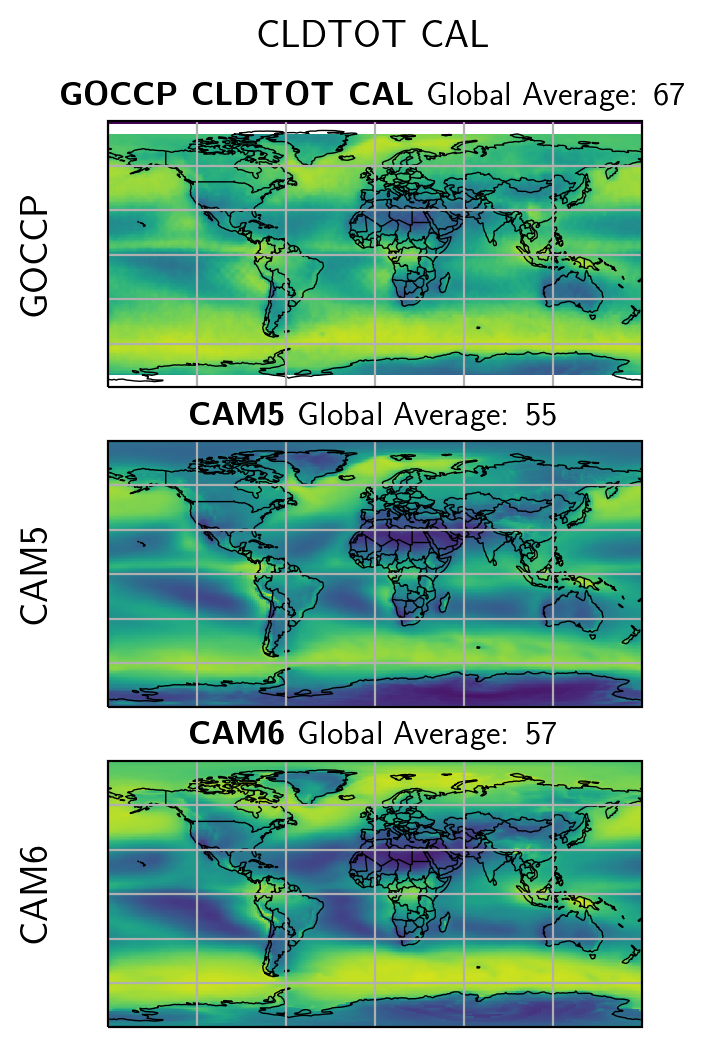

In [33]:
test3 = fig1metric.plot2D('CLDTOT_CAL',layers=False,bias=False)

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/

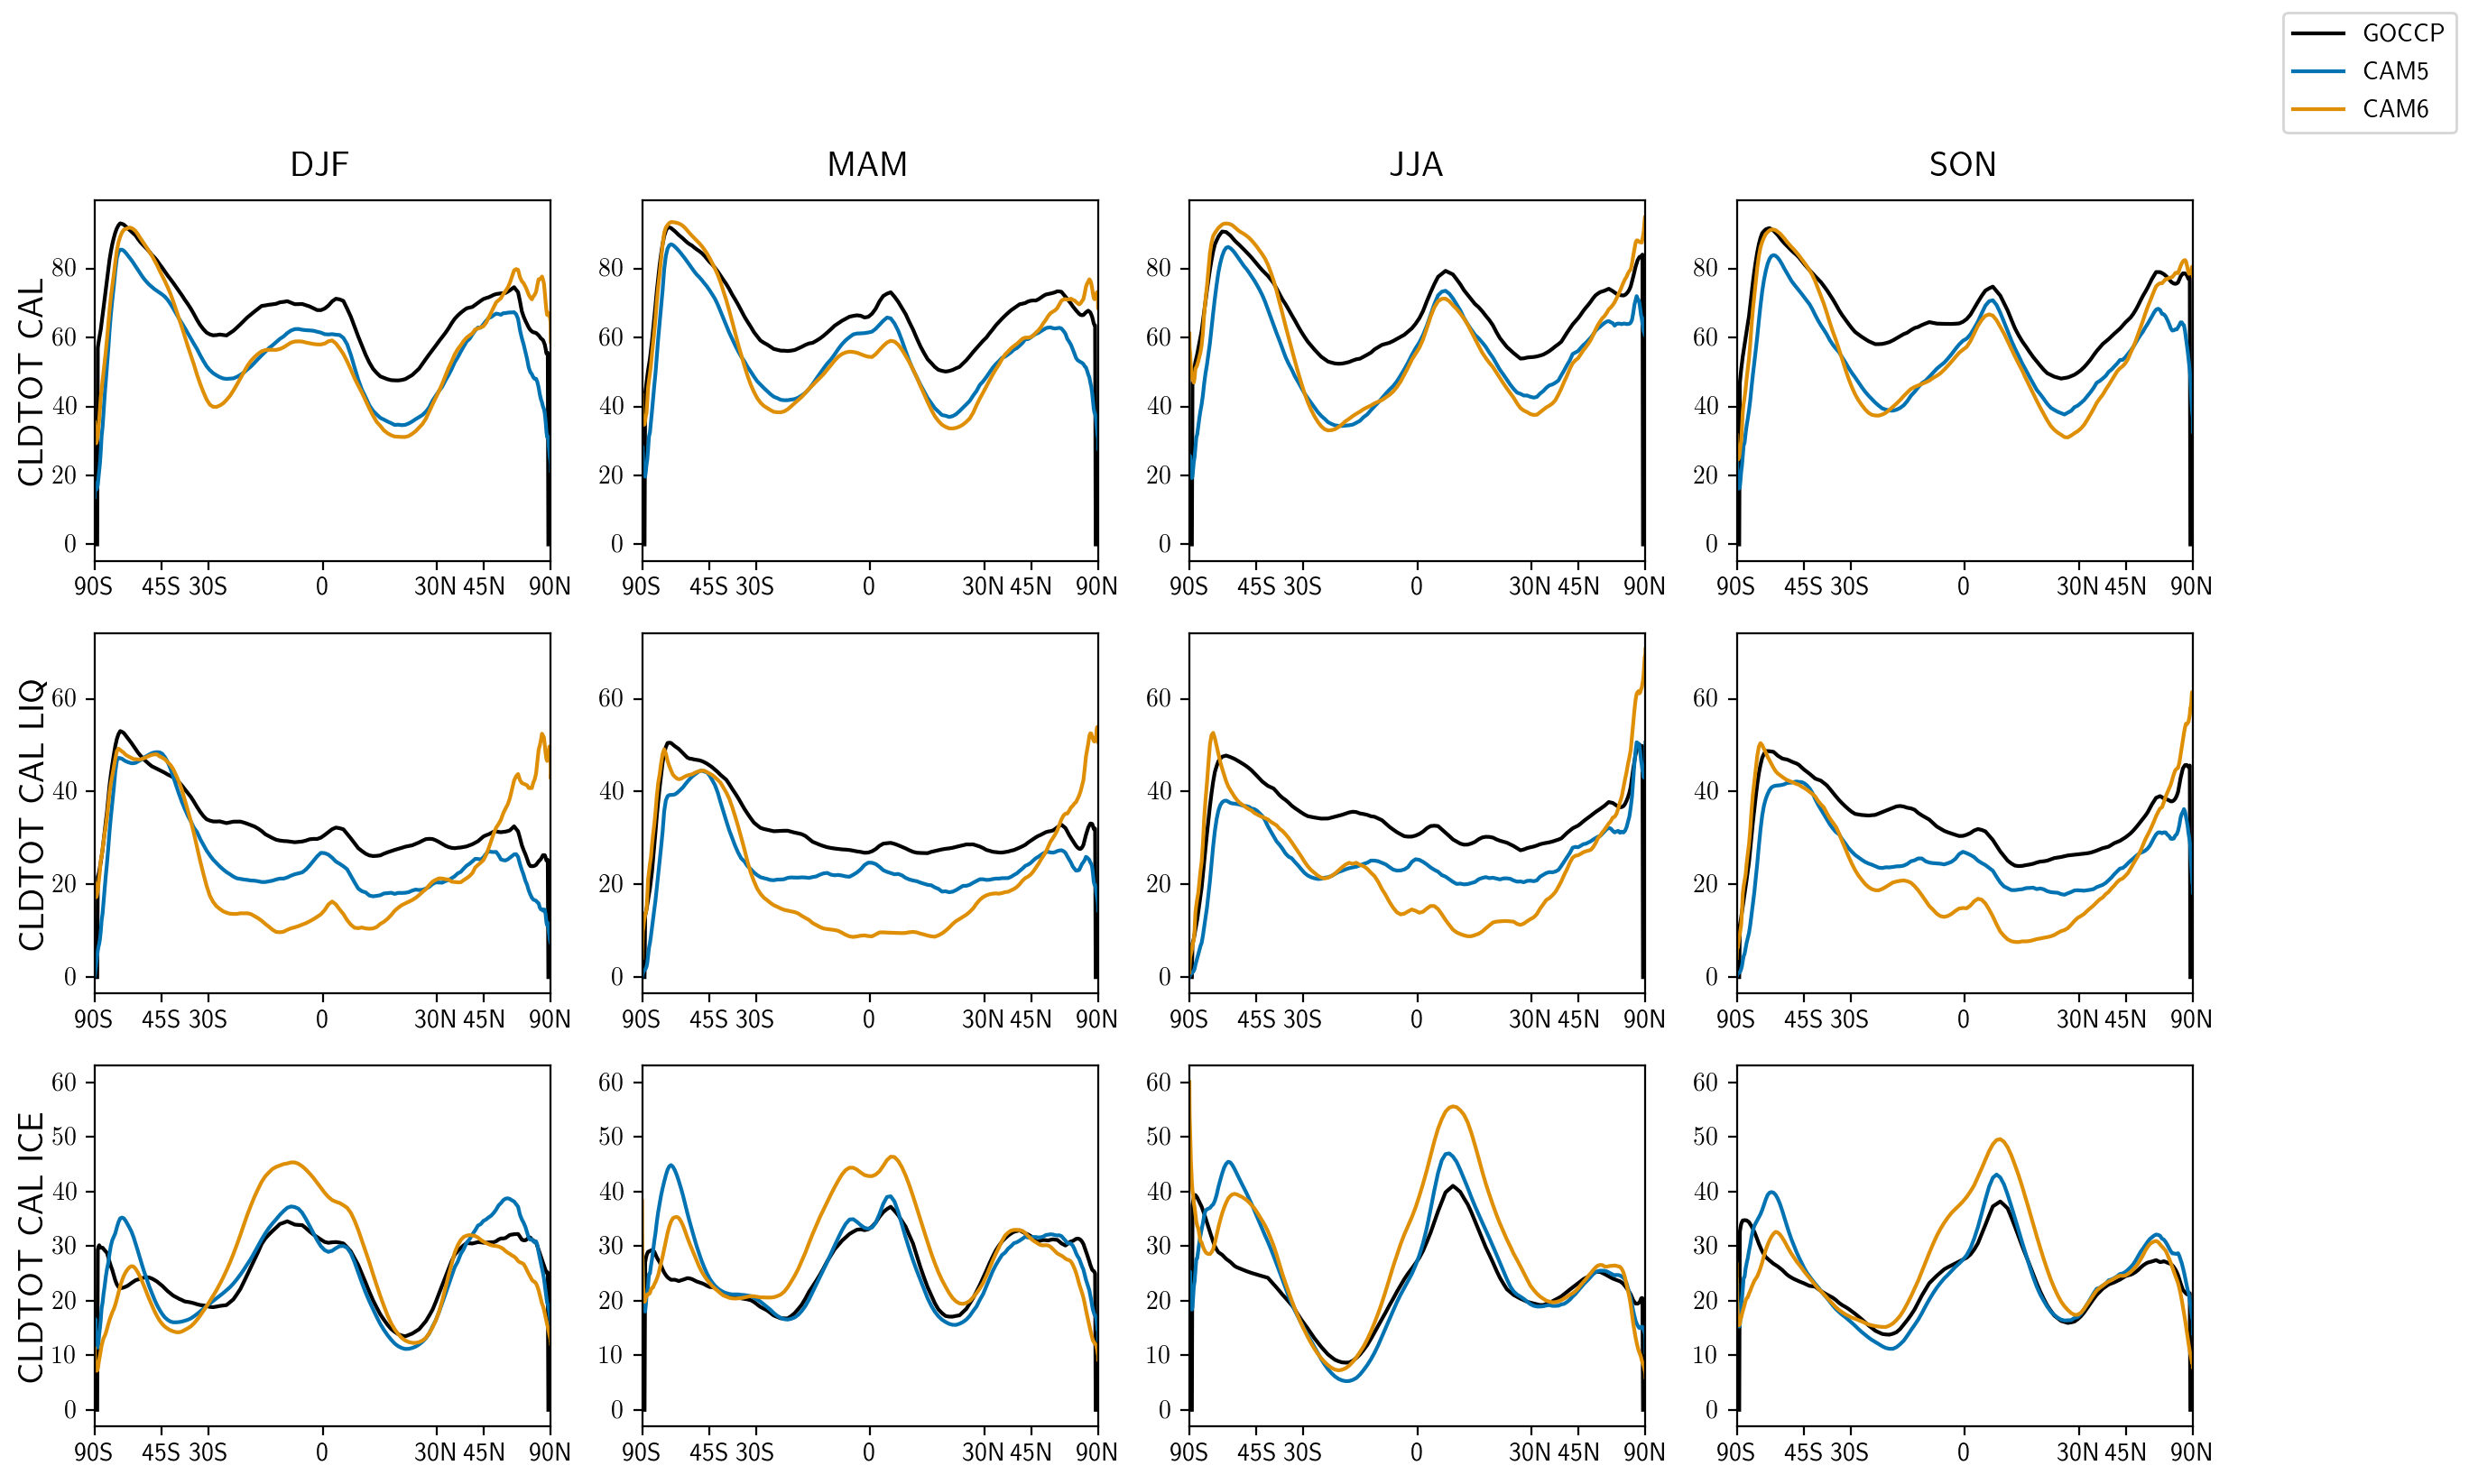

In [30]:
test3 = fig1metric.plot1D('CLDTOT_CAL',layers=True,bias=False,seasonal=True)

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Ple

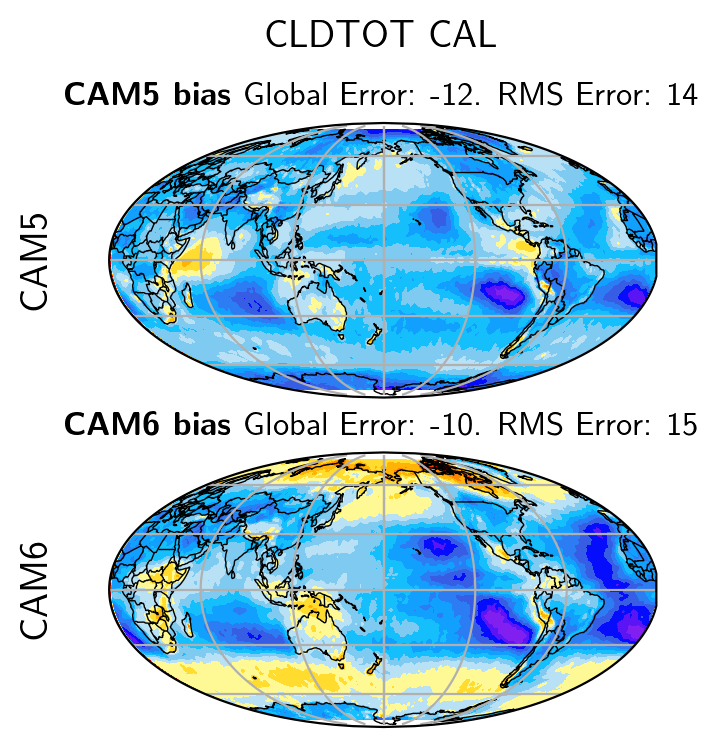

In [35]:
test3 = fig1metric.plot2D('CLDTOT_CAL',layers=False,bias=True,contour=True,levels=np.linspace(-40,40,17),projection='Mollweide')

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Ple

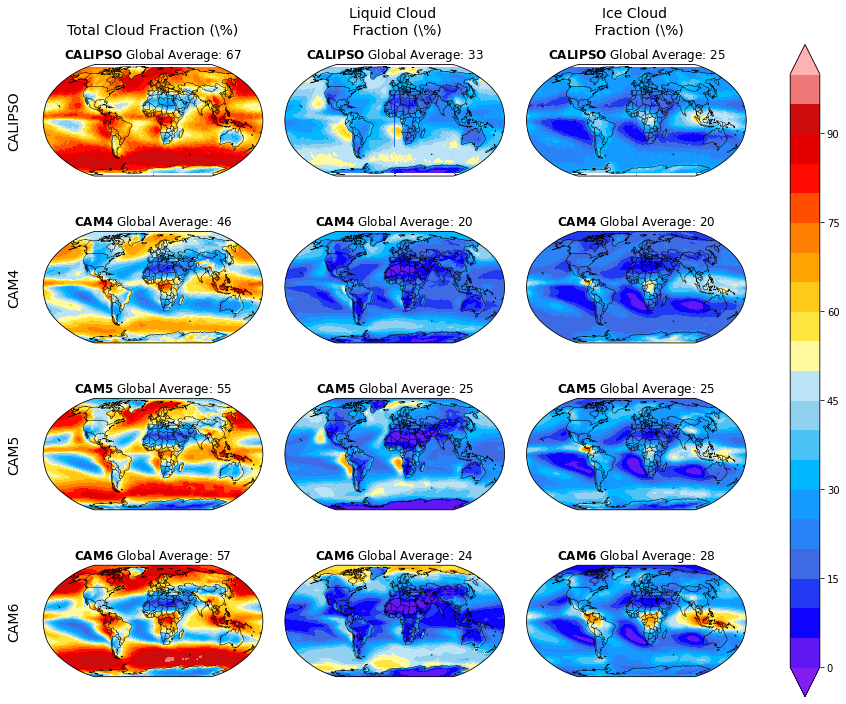

In [6]:
test3 = fig1metric.plot2D('CLDTOT_CAL',layers=True,bias=False,contour=True,levels=np.linspace(0,100,21),projection='Robinson')

In [7]:
mpl.rc('text', usetex=True)

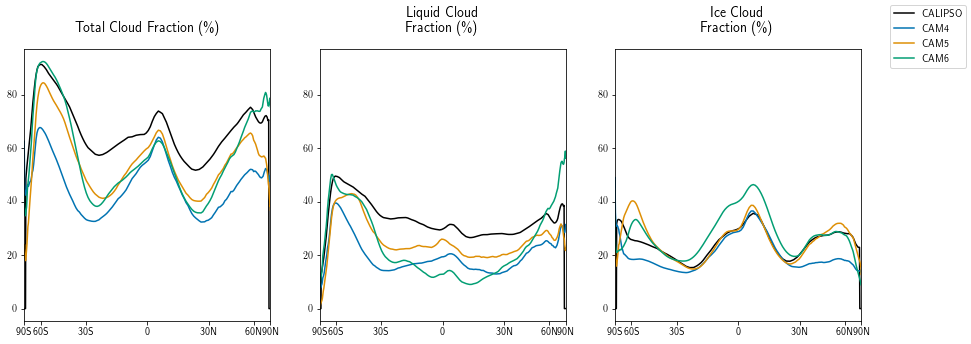

In [8]:
test3 = fig1metric.plot1D('CLDTOT_CAL',layers=True,bias=False)

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


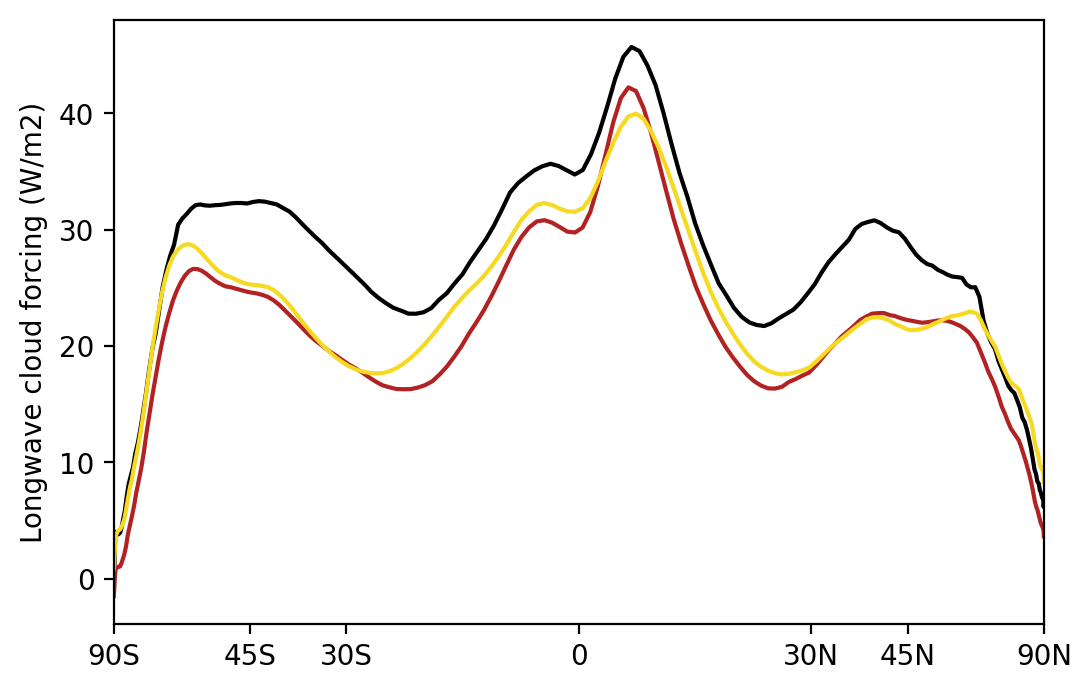

In [7]:
test3 = fig1metric.plot1D('LWCF',bias=False)

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


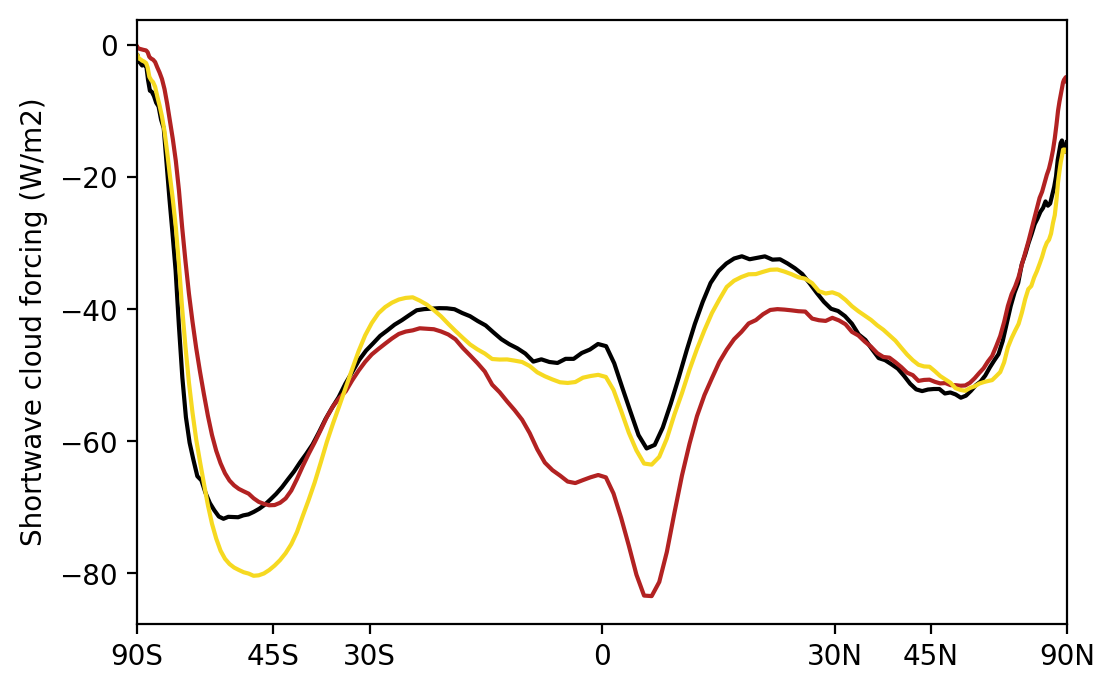

In [8]:
test3 = fig1metric.plot1D('SWCF',bias=False)

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'robust'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar',

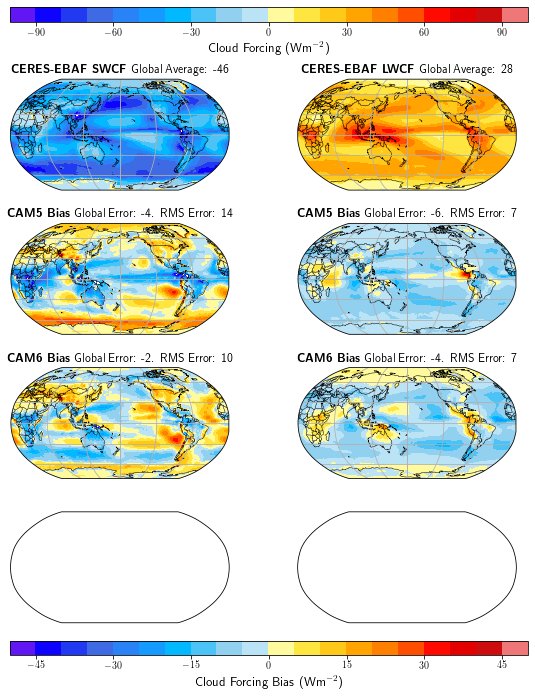

In [43]:
# fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row')
fig, axs = sp_map(nrows=4, ncols=2, projection=ccrs.Robinson(central_longitude=180))#, figsize=[15,2*(len(self.cases))])

fig.set_figheight(10)
fig.set_figwidth(10)
# fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06, hspace=0.30)

swcfobs = obsmetric.plot2D('SWCF',ax=[axs[0]],bias=False,contour=True,
                           levels=np.linspace(-100,100,21),extend='neither',
                           projection='Robinson',add_colorbar=False,label=False)
lwcfobs = obsmetric.plot2D('LWCF',ax=[axs[1]],bias=False,contour=True,
                           levels=np.linspace(-100,100,21),extend='neither',
                           projection='Robinson',add_colorbar=False,label=False)

swcfcam4 = fig1metric.plot2D('SWCF',ax=axs[2:][::2],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)
lwcfcam4 = fig1metric.plot2D('LWCF',ax=axs[3:][::2],bias=True,contour=True,
                             levels=np.linspace(-50,50,21),extend='neither',
                             projection='Robinson',add_colorbar=False,label=False)


cbar_axh1 = fig.add_axes([0.16, 0.96, 0.72, 0.02])
cbar_axh2 = fig.add_axes([0.16, 0.08, 0.72, 0.02])

cbar1 = fig.colorbar(swcfobs[1], cax=cbar_axh1,orientation='horizontal')
cbar2 = fig.colorbar(lwcfcam4[1], cax=cbar_axh2,orientation='horizontal')

cbar1.set_label(r"Cloud Forcing (Wm$^{-2}$)",fontsize=13)
cbar2.set_label(r"Cloud Forcing Bias (Wm$^{-2}$)",fontsize=13)

# cbar1.set_label("%s (%s)" % (_da[var].long_name,_da[var].units))
# cbar2.set_label("%s (%s)" % (_da[var].long_name,_da[var].units))

{'levels': array([-100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,  -20.,
        -10.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,
         80.,   90.,  100.]), 'extend': 'neither', 'robust': True, 'add_colorbar': False, 'transform': <cartopy.crs.PlateCarree object at 0x2b152c16bbf0>, 'cmap': <cmaps.colormap.Colormap object at 0x2b1518bbba10>}


/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


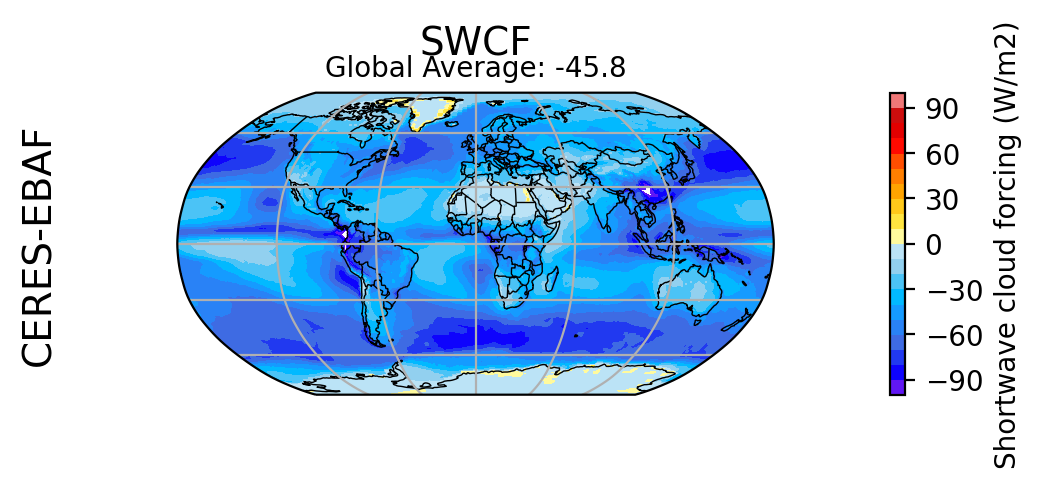

In [46]:
swcfobs = obsmetric.plot2D('SWCF',bias=False,contour=True,levels=np.linspace(-100,100,21),extend='neither',projection='Robinson')

{'levels': array([-50., -45., -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,
         5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.]), 'extend': 'neither', 'robust': True, 'add_colorbar': False, 'transform': <cartopy.crs.PlateCarree object at 0x2b3887f1cb90>, 'cmap': <cmaps.colormap.Colormap object at 0x2b387d702810>}
< GeoAxes: <cartopy.crs.Robinson object at 0x2b387f3153b0> >


/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


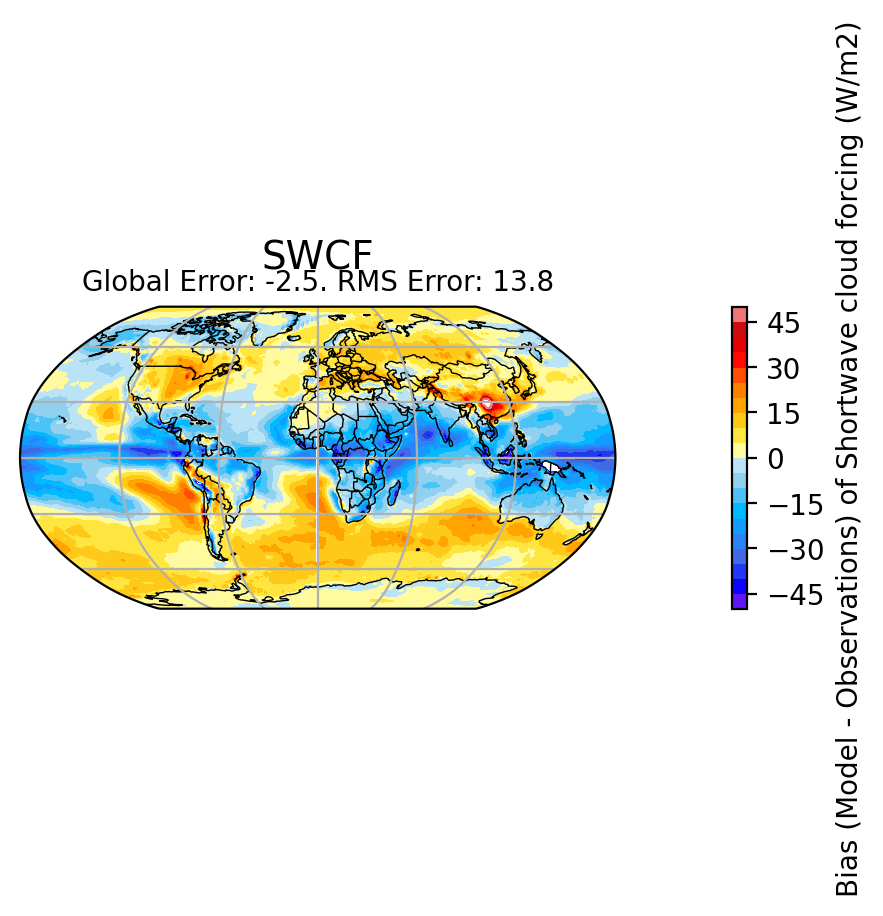

In [9]:
swcfcam4 = cam4metric.plot2D('SWCF',bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')

In [31]:
case = cam4metric.get_case('cam4_1deg_release_amip')

In [32]:
ceres = cam4metric.ceres_data

In [38]:
ceres['SWCF'].mean(dim = 'time', skipna=True).where(
                                                ceres['lat'] > -90)

<xarray.DataArray 'SWCF' (lat: 180, lon: 360)>
array([[ -3.103917 ,  -3.1019168,  -3.0995836, ...,  -3.1034172,
         -3.1022506,  -3.1055837],
       [ -1.9836496,  -1.9814831,  -1.979983 , ...,  -1.9820664,
         -1.9867331,  -1.9853997],
       [ -1.8959167,  -1.8936669,  -1.8912501, ...,  -1.89925  ,
         -1.8977501,  -1.8976667],
       ...,
       [-15.185414 , -15.187247 , -15.188166 , ..., -15.184249 ,
        -15.183999 , -15.185414 ],
       [-15.172412 , -15.174329 , -15.161161 , ..., -15.172495 ,
        -15.170245 , -15.172412 ],
       [-14.2976675, -14.299169 , -14.302084 , ..., -14.294666 ,
        -14.293835 , -14.294833 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [16]:
obsmetric.ceres_data['SWCF']

<xarray.DataArray 'SWCF' (time: 120, lat: 180, lon: 360)>
array([[[-7.3999939e+00, -7.3999939e+00, -7.3999939e+00, ...,
         -7.3999939e+00, -7.3999939e+00, -7.3999939e+00],
        [-1.6699982e+01, -1.6699982e+01, -1.6699982e+01, ...,
         -1.6699982e+01, -1.6699982e+01, -1.6699982e+01],
        [-1.2000000e+01, -1.2000000e+01, -1.2000000e+01, ...,
         -1.2000000e+01, -1.2000000e+01, -1.2000000e+01],
        ...,
        [-4.1999999e-02, -4.1999999e-02, -4.1999999e-02, ...,
         -4.1999999e-02, -4.1999999e-02, -4.1999999e-02],
        [-4.2999998e-02, -4.2999998e-02, -4.2999998e-02, ...,
         -4.2999998e-02, -4.2999998e-02, -4.2999998e-02],
        [-4.2999998e-02, -4.2999998e-02, -4.2999998e-02, ...,
         -4.2999998e-02, -4.2999998e-02, -4.2999998e-02]],

       [[-2.8500000e+01, -2.8500000e+01, -2.8500000e+01, ...,
         -2.8500000e+01, -2.8500000e+01, -2.8500000e+01],
        [-5.8999939e+00, -5.8999939e+00, -5.8999939e+00, ...,
         -5.8999939e+00, -5.8999939e+00, -5.8999939e+00],
        [-6.5999908e+00, -6.5999908e+00, -6.5999908e+00, ...,
         -6.5999908e+00, -6.5999908e+00, -6.5999908e+00],
...
        [ 5.5999998e-02,  5.5999998e-02,  5.5999998e-02, ...,
          5.5999998e-02,  5.5999998e-02,  5.5999998e-02],
        [ 5.5000003e-02,  5.5000003e-02,  5.5000003e-02, ...,
          5.5000003e-02,  5.5000003e-02,  5.5000003e-02],
        [ 5.5000003e-02,  5.5000003e-02,  5.5000003e-02, ...,
          5.5000003e-02,  5.5000003e-02,  5.5000003e-02]],

       [[-7.5000000e+00, -7.5000000e+00, -7.5000000e+00, ...,
         -7.5000000e+00, -7.5000000e+00, -7.5000000e+00],
        [-8.9000244e+00, -8.9000244e+00, -8.9000244e+00, ...,
         -8.9000244e+00, -8.9000244e+00, -8.9000244e+00],
        [-5.6000061e+00, -5.6000061e+00, -5.6000061e+00, ...,
         -5.6000061e+00, -5.6000061e+00, -5.6000061e+00],
        ...,
        [ 9.9999998e-03,  9.9999998e-03,  9.9999998e-03, ...,
          9.9999998e-03,  9.9999998e-03,  9.9999998e-03],
        [ 1.1000000e-02,  1.1000000e-02,  1.1000000e-02, ...,
          1.1000000e-02,  1.1000000e-02,  1.1000000e-02],
        [ 1.1000000e-02,  1.1000000e-02,  1.1000000e-02, ...,
          1.1000000e-02,  1.1000000e-02,  1.1000000e-02]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2006-01-15 2006-02-15 ... 2015-12-15

In [18]:
obsmetric.goccp_data['CLDHGH_CAL_LIQ']

,Array,Chunk
Bytes,50.87 MB,442.37 kB
Shape,"(115, 192, 288)","(1, 192, 288)"
Count,460 Tasks,115 Chunks
Type,float64,numpy.ndarray


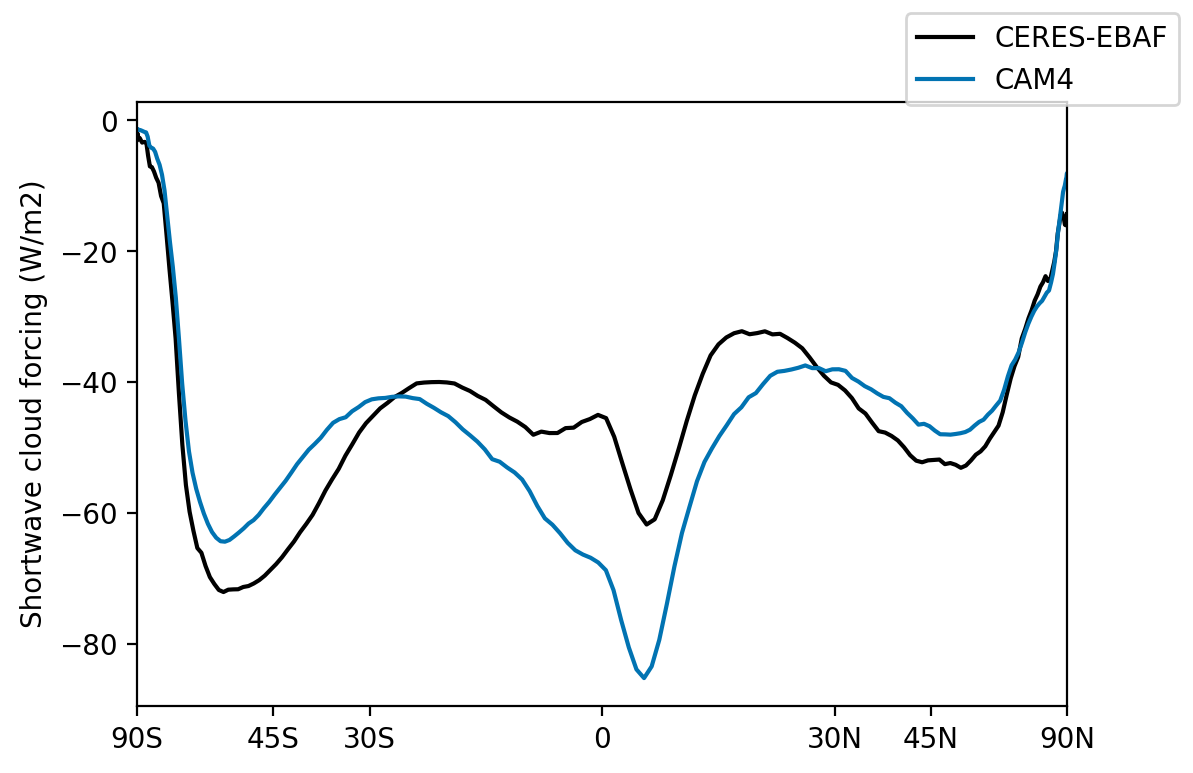

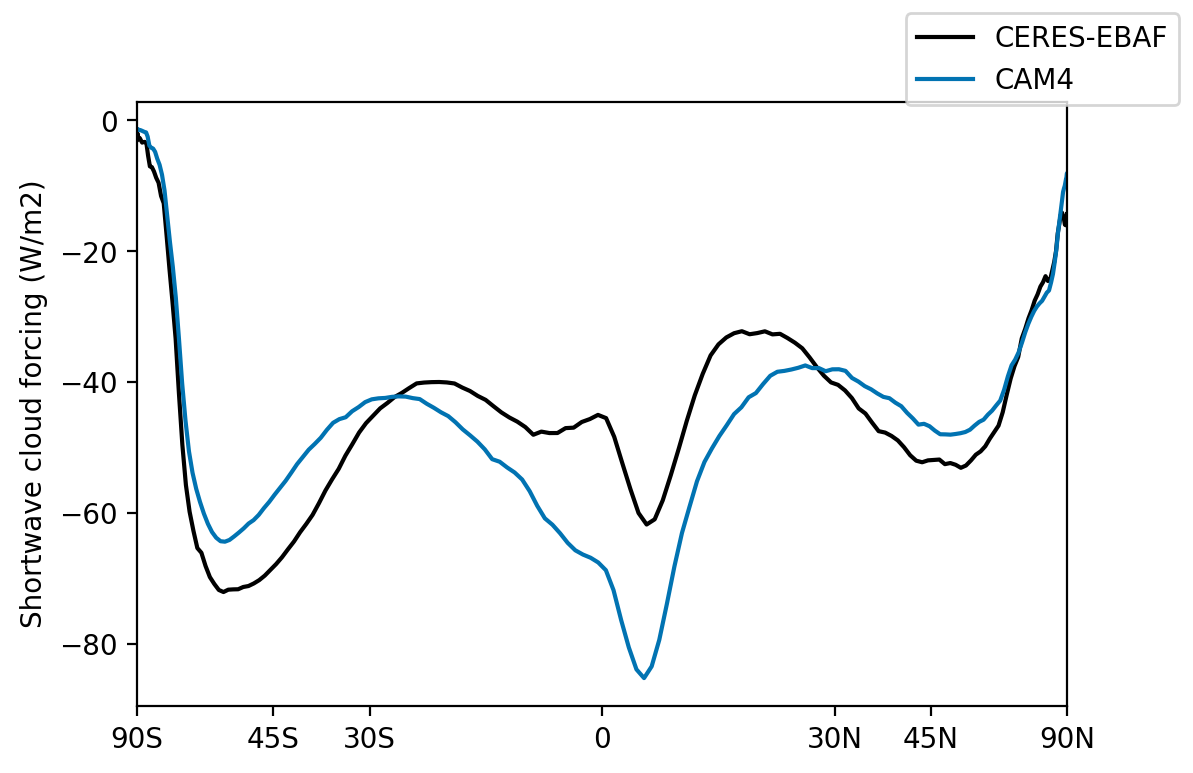

In [7]:
cam4metric.plot1D('SWCF')

In [41]:
excase

{'cam4_1deg_release_amip': <cloud_metric.Model_case at 0x2ac53519ff90>}

In [8]:
excase = cam4metric.get_case('cam4_1deg_release_amip').case_da

In [9]:
excase['LWCF'].attrs

{'Sampling_Sequence': 'rad_lwsw',
 'units': 'W/m2',
 'long_name': 'Longwave cloud forcing',
 'cell_methods': 'time: mean'}

In [10]:
excase['SWCF'].attrs

{'Sampling_Sequence': 'rad_lwsw',
 'units': 'W/m2',
 'long_name': 'Shortwave cloud forcing',
 'cell_methods': 'time: mean'}

In [ ]:
ds.time.assign_attrs(units=newtimeattr)

In [ ]:
{'Sampling_Sequence': 'rad_lwsw',
 'units': 'W/m2',
 'long_name': 'Shortwave cloud forcing',
 'cell_methods': 'time: mean'}

In [12]:
ceres_var_dict = {
    'toa_sw_all_mon':'FSNT','toa_lw_all_mon':'FLNT', # FSNT is wrong (both sign and magnitude)
    'toa_sw_clr_c_mon':'FSNTC','toa_lw_clr_c_mon':'FLNTC', # _c_ means that it is just from clear footprints
    'cldtau_total_day_mon':'CLDTAU','solar_mon':'SOLIN',
}

print('Loading CERES-EBAF fluxes...', end = '')
_ceres_data = xr.open_dataset('/glade/u/home/jonahshaw/obs/CERES_EBAF/CERES_EBAF-TOA_Ed4.1_Subset_200003-202002.nc')
_ceres_data = _ceres_data.sel(time=slice('2006-01-01', '2015-12-31')) # Use AMIP by default
_ceres_data = add_weights(_ceres_data)
# Flip FLNSC so it matches model convention (net-LW is down, net-SW is up)
#         _ceres_data['sfc_net_lw_clr_t_mon'] = -1*_ceres_data['sfc_net_lw_clr_t_mon']

# Derive Cloud Radiative Effect Variables
_ceres_data['SWCF'] = _ceres_data['toa_sw_clr_c_mon'] - _ceres_data['toa_sw_all_mon']
_ceres_data['LWCF'] = _ceres_data['toa_lw_clr_c_mon'] - _ceres_data['toa_lw_all_mon']        # Rename variables so they will match standard CAM variables names and index correctly
ceres_data_final = _ceres_data.rename(ceres_var_dict)

print('done.')

Loading CERES-EBAF fluxes...done.


In [15]:
out = _ceres_data['SWCF'].assign_attrs({'Sampling_Sequence': 'rad_lwsw',
 'units': 'W/m2',
 'long_name': 'Shortwave cloud forcing',
 'cell_methods': 'time: mean'})

In [18]:
ls '/glade/u/home/jonahshaw/w/obs/CALIPSO/GOCCP/2Ddata/1.25x0.9_python_interp/'

2006/  2007/  2008/  2009/  2010/  2011/  2012/  2013/  2014/  2015/


In [21]:
goccp = cam4metric.goccp_data

In [22]:
goccp.to_netcdf('/glade/u/home/jonahshaw/w/obs/CALIPSO/GOCCP/2Ddata/1.25x0.9_python_interp/amip_processed.nc')

In [31]:
ceres_data_final['FLNT']

<xarray.DataArray 'FLNT' (time: 120, lat: 180, lon: 360)>
[7776000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2006-01-15 2006-02-15 ... 2015-12-15
Attributes:
    long_name:      Top of The Atmosphere Longwave Flux, All-Sky conditions, ...
    standard_name:  TOA Longwave Flux - All-Sky
    CF_name:        toa_outgoing_longwave_flux
    comment:        none
    units:          W m-2
    valid_min:            0.00000
    valid_max:            400.000

In [26]:
ceres_data_final['SWCF']

<xarray.DataArray 'SWCF' (time: 120, lat: 180, lon: 360)>
array([[[-7.3999939e+00, -7.3999939e+00, -7.3999939e+00, ...,
         -7.3999939e+00, -7.3999939e+00, -7.3999939e+00],
        [-1.6699982e+01, -1.6699982e+01, -1.6699982e+01, ...,
         -1.6699982e+01, -1.6699982e+01, -1.6699982e+01],
        [-1.2000000e+01, -1.2000000e+01, -1.2000000e+01, ...,
         -1.2000000e+01, -1.2000000e+01, -1.2000000e+01],
        ...,
        [-4.1999999e-02, -4.1999999e-02, -4.1999999e-02, ...,
         -4.1999999e-02, -4.1999999e-02, -4.1999999e-02],
        [-4.2999998e-02, -4.2999998e-02, -4.2999998e-02, ...,
         -4.2999998e-02, -4.2999998e-02, -4.2999998e-02],
        [-4.2999998e-02, -4.2999998e-02, -4.2999998e-02, ...,
         -4.2999998e-02, -4.2999998e-02, -4.2999998e-02]],

       [[-2.8500000e+01, -2.8500000e+01, -2.8500000e+01, ...,
         -2.8500000e+01, -2.8500000e+01, -2.8500000e+01],
        [-5.8999939e+00, -5.8999939e+00, -5.8999939e+00, ...,
         -5.8999939e+00, -5.8999939e+00, -5.8999939e+00],
        [-6.5999908e+00, -6.5999908e+00, -6.5999908e+00, ...,
         -6.5999908e+00, -6.5999908e+00, -6.5999908e+00],
...
        [ 5.5999998e-02,  5.5999998e-02,  5.5999998e-02, ...,
          5.5999998e-02,  5.5999998e-02,  5.5999998e-02],
        [ 5.5000003e-02,  5.5000003e-02,  5.5000003e-02, ...,
          5.5000003e-02,  5.5000003e-02,  5.5000003e-02],
        [ 5.5000003e-02,  5.5000003e-02,  5.5000003e-02, ...,
          5.5000003e-02,  5.5000003e-02,  5.5000003e-02]],

       [[-7.5000000e+00, -7.5000000e+00, -7.5000000e+00, ...,
         -7.5000000e+00, -7.5000000e+00, -7.5000000e+00],
        [-8.9000244e+00, -8.9000244e+00, -8.9000244e+00, ...,
         -8.9000244e+00, -8.9000244e+00, -8.9000244e+00],
        [-5.6000061e+00, -5.6000061e+00, -5.6000061e+00, ...,
         -5.6000061e+00, -5.6000061e+00, -5.6000061e+00],
        ...,
        [ 9.9999998e-03,  9.9999998e-03,  9.9999998e-03, ...,
          9.9999998e-03,  9.9999998e-03,  9.9999998e-03],
        [ 1.1000000e-02,  1.1000000e-02,  1.1000000e-02, ...,
          1.1000000e-02,  1.1000000e-02,  1.1000000e-02],
        [ 1.1000000e-02,  1.1000000e-02,  1.1000000e-02, ...,
          1.1000000e-02,  1.1000000e-02,  1.1000000e-02]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2006-01-15 2006-02-15 ... 2015-12-15